Dropdown(description='Plot Type:', index=1, options=('Single Coin', 'Comparison'), value='Comparison')

Dropdown(description='Select cryptocurrency 1:', options=('BTC-USD', 'ETH-USD', 'USDT-USD', 'BNB-USD', 'USDC-U…

Dropdown(description='Select cryptocurrency 2:', index=1, options=('BTC-USD', 'ETH-USD', 'USDT-USD', 'BNB-USD'…

DatePicker(value=datetime.date(2023, 5, 24), description='Start Date:')

DatePicker(value=datetime.date(2023, 5, 31), description='End Date:')

Button(description='Update Plot', style=ButtonStyle())

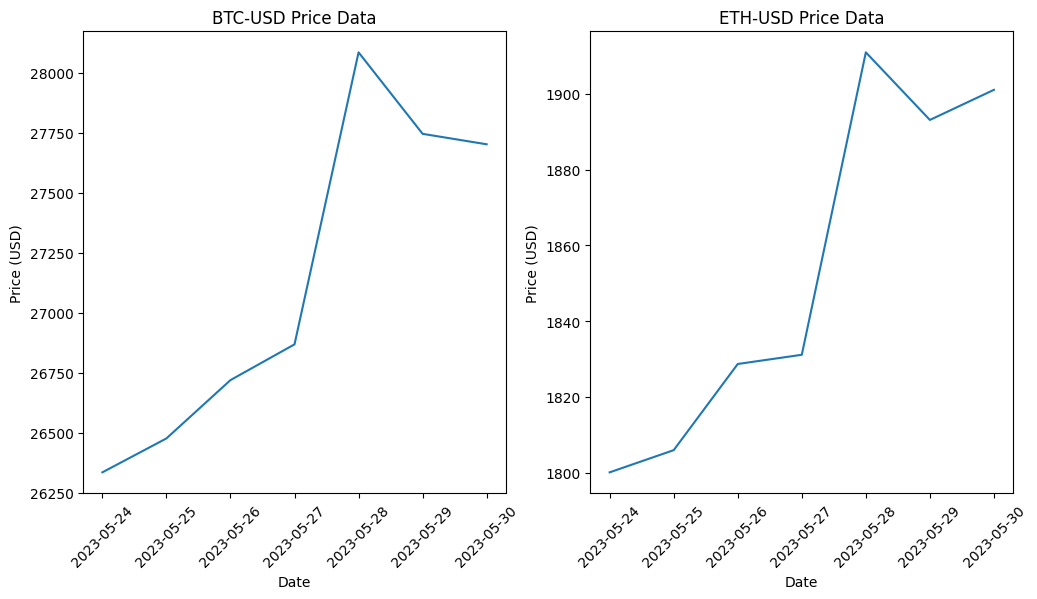

In [ ]:
import yfinance as yf
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Dropdown widgets that can be used to select a cryptocurrency
dropdown_1 = widgets.Dropdown(
    options=['BTC-USD', 'ETH-USD', 'USDT-USD', 'BNB-USD', 'USDC-USD', 'XRP-USD', 'ADA-USD', 'STETH-USD', 'DOGE-USD',
             'HEX-USD', 'SOL-USD', 'MATIC-USD', 'WTRX-USD', 'TRX-USD', 'DOT-USD', 'LTC-USD', 'BUSD-USD', 'SHIB-USD',
             'AVAX-USD', 'DAI-USD', 'WBTC-USD', 'LINK-USD', 'LEO-USD', 'ATOM-USD', 'UNI7083-USD', 'XMR-USD', 'OKB-USD',
             'ETC-USD', 'XLM-USD', 'TON11419-USD'],
    value='BTC-USD',
    description='Select cryptocurrency 1:'
)

dropdown_2 = widgets.Dropdown(
    options=['BTC-USD', 'ETH-USD', 'USDT-USD', 'BNB-USD', 'USDC-USD', 'XRP-USD', 'ADA-USD', 'STETH-USD', 'DOGE-USD',
             'HEX-USD', 'SOL-USD', 'MATIC-USD', 'WTRX-USD', 'TRX-USD', 'DOT-USD', 'LTC-USD', 'BUSD-USD', 'SHIB-USD',
             'AVAX-USD', 'DAI-USD', 'WBTC-USD', 'LINK-USD', 'LEO-USD', 'ATOM-USD', 'UNI7083-USD', 'XMR-USD', 'OKB-USD',
             'ETC-USD', 'XLM-USD', 'TON11419-USD'],
    value='ETH-USD',
    description='Select cryptocurrency 2:'
)

# Datepicker widgets that enable us to select start and end dates
s_d_picker = widgets.DatePicker(
    description='Start Date:',
    value=datetime.date.today() - datetime.timedelta(days=7),
    format='%Y-%m-%d'
)

e_d_picker = widgets.DatePicker(
    description='End Date:',
    value=datetime.date.today(),
    format='%Y-%m-%d'
)

# Dropdown widget for plot type selection
plot_type_dropdown = widgets.Dropdown(
    options=['Single Coin', 'Comparison'],
    value='Single Coin',
    description='Plot Type:'
)

# A widget with a button that is used for updating the plot
update_button = widgets.Button(description='Update Plot')

# When we press the button, a function will update the graph
def update_plot(button):
    s_d = s_d_picker.value
    e_d = e_d_picker.value
    
    # When we click the button, the graph is refreshed
    plot_type = plot_type_dropdown.value
    
    # Define fig with a default value
    fig = None
    
    if plot_type == 'Single Coin':
        # Create subplots for individual cryptocurrencies
        fig, ax = plt.subplots(figsize=(12, 6))
        
        # Generate a plot linked to cryptocurrency 1
        crypto = dropdown_1.value
        plot_single_crypto_price_data(crypto, s_d, e_d, ax)
        
        # Display the plot
        plt.show()
    elif plot_type == 'Comparison':
        if dropdown_1.value == dropdown_2.value:
            print(" ")
        else:
            # Create subplots for each cryptocurrency
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
            
            # Crypto 1 data is plotted
            crypto_1 = dropdown_1.value
            plot_crypto_price_data(crypto_1, s_d, e_d, ax1)
            
            # Crypto 2 data is plotted
            crypto_2 = dropdown_2.value
            plot_crypto_price_data(crypto_2, s_d, e_d, ax2)
            
            # Display the plots
            plt.show()
    
    # Clear the output area
    clear_output(wait=True)
    
    # Display the input parameters
    display(plot_type_dropdown, dropdown_1, dropdown_2, s_d_picker, e_d_picker, update_button)
    
    # Display the output plots if fig is not None
    if fig is not None:
        display(fig)

# Add the update_plot function to the button widget
update_button.on_click(update_plot)

# Create a cryptocurrency price data function
def get_crypto_price_data(crypto, s_d, e_d):
    # Set start_date and end_date to their normal values if they are None
    if s_d is None and e_d is None:
        s_d = datetime.date.today() - datetime.timedelta(days=7)
        e_d = datetime.date.today()
    elif s_d is None:
        s_d = e_d - datetime.timedelta(days=7)
    elif e_d is None:
        e_d = s_d + datetime.timedelta(days=7)
        
    # Change start date and end date into datetime objects
    s_d = datetime.datetime.combine(s_d, datetime.datetime.min.time())
    e_d = datetime.datetime.combine(e_d, datetime.datetime.min.time())
    
    # Retrieve cryptocurrency price data using Yahoo Finance API
    price_data = yf.download(crypto, start=s_d, end=e_d)
    
    # Return pricing information in the form of a Pandas DataFrame
    return price_data

# Function to plot cryptocurrency data
def plot_crypto_price_data(crypto, s_d, e_d, ax):
    price_data = get_crypto_price_data(crypto, s_d, e_d)
    
    ax.plot(price_data['Adj Close'])
    ax.set_xlabel('Date')
    ax.set_ylabel('Price (USD)')
    ax.set_title(f'{crypto} Price Data')
    ax.tick_params(axis='x', rotation=45)

# Function to plot cryptocurrency data for a single coin
# def plot_single_crypto_price_data(crypto, s_d, e_d, ax):
#     price_data = get_crypto_price_data(crypto, s_d, e_d)
    
#     ax.plot(price_data['Adj Close'])
#     ax.set_xlabel('Date')
#     ax.set_ylabel('Price (USD)')
#     ax.set_title(f'{crypto} Price Data')
#     ax.tick_params(axis='x', rotation=45)

# Display the input parameters
display(plot_type_dropdown, dropdown_1, dropdown_2, s_d_picker, e_d_picker, update_button)


# **RANDOM FOREST**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import ipywidgets as widgets
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# We obtained historical data from the Yahoo Finance API
def get_historical_data(ticker_symbol, n_years):
    e_d = pd.Timestamp.today()
    s_d = e_d - pd.DateOffset(years=n_years)
    df = yf.download(ticker_symbol, start=s_d, end=e_d)
    return df

# We established a function named prepare_data, which accepts a DataFrame (df) as an argument
def prepare_data(df):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaleddata = scaler.fit_transform(df['Close'].values.reshape(-1, 1))
    return scaler, scaleddata

# Defined a function for dataset creation
def create_dataset(dataset, time_steps=1):
    X, Y = [], []
    for i in range(len(dataset)-time_steps):
        X.append(dataset[i:(i+time_steps), 0])
        Y.append(dataset[i+time_steps, 0])
    return np.array(X), np.array(Y)

# Train model
def train_model(model, X_train, Y_train):
    model.fit(X_train, Y_train)

# predictions are made
def make_predictions(model, X_test, scaler):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
    return predictions

# widgets are defined for the purpose of user input
ticker_widget = widgets.Dropdown(
    options=['BTC-USD', 'ETH-USD', 'USDT-USD', 'BNB-USD', 'USDC-USD', 'XRP-USD', 'ADA-USD', 'STETH-USD', 'DOGE-USD', 'HEX-USD', 'SOL-USD', 'MATIC-USD', 'WTRX-USD', 'TRX-USD', 'DOT-USD', 'LTC-USD', 'BUSD-USD', 'SHIB-USD', 'AVAX-USD', 'DAI-USD', 'WBTC-USD', 'LINK-USD', 'LEO-USD', 'ATOM-USD', 'UNI7083-USD', 'XMR-USD', 'OKB-USD', 'ETC-USD', 'XLM-USD', 'TON11419-USD'],
    value='BTC-USD',
    description='Select cryptocurrency:',
)

n_years_widget = widgets.IntSlider(
    value=2,
    min=1,
    max=5,
    step=1,
    description='Number of years to retrieve:',
)

n_days_widget = widgets.IntSlider(
    value=7,
    min=1,
    max=30,
    step=1,
    description='Number of days to predict:',
)

button = widgets.Button(description='Update Plot')

# Output plot is shown
output_plot = widgets.Output()

def on_button_click(b):
    with output_plot:
        # previous output is cleared
        output_plot.clear_output()

        # historical data is retrieved
        df = get_historical_data(ticker_widget.value, n_years_widget.value)
        print(df)

        # data is prepared
        scaler, scaleddata = prepare_data(df)

        # we splitted data into 2 sets: train and test
        train_data = scaleddata[:int(len(df)*0.8)]
        test_data = scaleddata[int(len(df)*0.8):]

        # training dataset is created
        time_steps = 10
        X_train, Y_train = create_dataset(train_data, time_steps)
        X_test, Y_test = create_dataset(test_data, time_steps)

        # a model is created and trained
        model = RandomForestRegressor(n_estimators=200, max_features='sqrt', random_state=42)
        train_model(model, X_train, Y_train.ravel())

        # predictions are made
        predictions = make_predictions(model, X_test, scaler)

        # turned predictions and real prices around and put them on the same scale
        Y_test = scaler.inverse_transform([Y_test.ravel()])[0]

        # we Calculated accuracy of the model
        mae = mean_absolute_error(Y_test, predictions)
        mse = mean_squared_error(Y_test, predictions)
        rmse = np.sqrt(mse)
        r2 = r2_score(Y_test, predictions)

        # percentages are converted within 100%
        rmse_percent = min((rmse / (Y_test.max() - Y_test.min())) * 100, 100)
        mae_percent = min((mae / (Y_test.max() - Y_test.min())) * 100, 100)
        r2_percent = min(((r2 + 1) / 2) * 100, 100)

        # values are printed within 100%
        print("Model Accuracy:")
        print(f"RMSE: {rmse_percent:.2f}%")
        print(f"MAE: {mae_percent:.2f}%")
        print(f"R2 Score: {r2_percent:.2f}%")

        # predictions are then plotted
        plt.figure(figsize=(12, 6))
        plt.plot(predictions, label='Predictions')
        plt.plot(Y_test, label='Actual values')
        plt.xlabel('Time')
        plt.ylabel('Price')
        plt.title('Actual vs. Predicted Prices')
        plt.legend()
        plt.show()

        # price is predicted for the chosen day n
        last_n_days = scaleddata[-time_steps:]
        for _ in range(n_days_widget.value):
            last_n_days_reshaped = np.reshape(last_n_days, (1, time_steps))
            predicted_price = model.predict(last_n_days_reshaped)
            last_n_days = np.roll(last_n_days, -1)
            last_n_days[-1] = predicted_price

        predicted_price = scaler.inverse_transform(predicted_price.reshape(-1, 1))

        print(f"Predicted price for the selected {n_days_widget.value}th day:")
        print(predicted_price)

# event handler is registered
button.on_click(on_button_click)

# widgets and the button are displayed
display(ticker_widget, n_years_widget, n_days_widget, button, output_plot)



Dropdown(description='Select cryptocurrency:', options=('BTC-USD', 'ETH-USD', 'USDT-USD', 'BNB-USD', 'USDC-USD…

IntSlider(value=2, description='Number of years to retrieve:', max=5, min=1)

IntSlider(value=7, description='Number of days to predict:', max=30, min=1)

Button(description='Update Plot', style=ButtonStyle())

Output()

# **SVM ALGORITHM**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import ipywidgets as widgets
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# We obtained historical data from the Yahoo Finance API
def get_historical_data(ticker_symbol, n_years):
    e_d = pd.Timestamp.today()
    s_d = e_d - pd.DateOffset(years=n_years)
    df = yf.download(ticker_symbol, start=s_d, end=e_d)
    return df

# We established a function named prepare_data, which accepts a DataFrame (df) as an argument
def prepare_data(df):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaleddata = scaler.fit_transform(df['Close'].values.reshape(-1, 1))
    return scaler, scaleddata

# Defined a function for dataset creation
def create_dataset(dataset, time_steps=1):
    X, Y = [], []
    for i in range(len(dataset)-time_steps):
        X.append(dataset[i:(i+time_steps), 0])
        Y.append(dataset[i+time_steps, 0])
    return np.array(X), np.array(Y)

# Train model
def train_model(model, X_train, Y_train):
    model.fit(X_train, Y_train)

# predictions are made
def make_predictions(model, X_test, scaler):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
    return predictions

# widgets are defined for the purpose of user input
ticker_widget = widgets.Dropdown(
    options=['BTC-USD', 'ETH-USD', 'USDT-USD', 'BNB-USD', 'USDC-USD', 'XRP-USD', 'ADA-USD', 'STETH-USD', 'DOGE-USD', 'HEX-USD', 'SOL-USD', 'MATIC-USD', 'WTRX-USD', 'TRX-USD', 'DOT-USD', 'LTC-USD', 'BUSD-USD', 'SHIB-USD', 'AVAX-USD', 'DAI-USD', 'WBTC-USD', 'LINK-USD', 'LEO-USD', 'ATOM-USD', 'UNI7083-USD', 'XMR-USD', 'OKB-USD', 'ETC-USD', 'XLM-USD', 'TON11419-USD'],
    value='BTC-USD',
    description='Select cryptocurrency:'
)

n_years_widget = widgets.IntSlider(
    value=2,
    min=1,
    max=5,
    step=1,
    description='Number of years to retrieve:'
)

n_days_widget = widgets.IntSlider(
    value=7,
    min=1,
    max=30,
    step=1,
    description='Number of days to predict:'
)

button = widgets.Button(description='Update Plot')

# Output plot is shown
output_plot = widgets.Output()

def on_button_click(b):
    with output_plot:
        # previous output is cleared
        output_plot.clear_output()

        # historical data is retrieved
        df = get_historical_data(ticker_widget.value, n_years_widget.value)
        print(df)

        # data is prepared
        scaler, scaleddata = prepare_data(df)

        # we splitted data into 2 sets: train and test
        train_data = scaleddata[:int(len(df)*0.8)]
        test_data = scaleddata[int(len(df)*0.8):]

        # training dataset is created
        time_steps = 10
        X_train, Y_train = create_dataset(train_data, time_steps)
        X_test, Y_test = create_dataset(test_data, time_steps)

        # a model is created and trained
        model = SVR()
        train_model(model, X_train, Y_train.ravel())

        # predictions are made
        predictions = make_predictions(model, X_test, scaler)

        # turned predictions and real prices around and put them on the same scale
        Y_test = scaler.inverse_transform([Y_test.ravel()])[0]

        # we Calculated accuracy of the model
        mae = mean_absolute_error(Y_test, predictions)
        mse = mean_squared_error(Y_test, predictions)
        rmse = np.sqrt(mse)
        r2 = r2_score(Y_test, predictions)

        # percentages are converted within 100%
        rmse_percent = min((rmse / (Y_test.max() - Y_test.min())) * 100, 100)
        mae_percent = min((mae / (Y_test.max() - Y_test.min())) * 100, 100)
        r2_percent = min(((r2 + 1) / 2) * 100, 100)

        # Print the values within 100%
        print("Model Accuracy:")
        print(f"RMSE: {rmse_percent:.2f}%")
        print(f"MAE: {mae_percent:.2f}%")
        print(f"R2 Score: {r2_percent:.2f}%")

        # Plot predictions
        plt.figure(figsize=(12, 6))
        plt.plot(predictions, label='Predictions')
        plt.plot(Y_test, label='Actual values')
        plt.xlabel('Time')
        plt.ylabel('Price')
        plt.title('Actual vs. Predicted Prices')
        plt.legend()
        plt.show()

        # price is predicted for the chosen day n
        last_n_days = scaleddata[-time_steps:]
        for _ in range(n_days_widget.value):
            last_n_days_reshaped = np.reshape(last_n_days, (1, time_steps))
            predicted_price = model.predict(last_n_days_reshaped)
            last_n_days = np.roll(last_n_days, -1)
            last_n_days[-1] = predicted_price

        predicted_price = scaler.inverse_transform(predicted_price.reshape(-1, 1))

        print(f"Predicted price for the selected {n_days_widget.value}th day:")
        print(predicted_price)

# event handler is registered
button.on_click(on_button_click)

# widgets and the button are displayed
display(ticker_widget, n_years_widget, n_days_widget, button, output_plot)


Dropdown(description='Select cryptocurrency:', options=('BTC-USD', 'ETH-USD', 'USDT-USD', 'BNB-USD', 'USDC-USD…

IntSlider(value=2, description='Number of years to retrieve:', max=5, min=1)

IntSlider(value=7, description='Number of days to predict:', max=30, min=1)

Button(description='Update Plot', style=ButtonStyle())

Output()

# **GRU ALGORITHM**

Dropdown(description='Select cryptocurrency 1:', options=('BTC-USD', 'ETH-USD', 'USDT-USD', 'BNB-USD', 'USDC-U…

IntSlider(value=2, description='Number of years: ', max=10, min=1)

IntSlider(value=7, description='Number of days to predict: ', max=30, min=1)

Button(description='Update plot', style=ButtonStyle())

[*********************100%***********************]  1 of 1 completed
                    Open          High           Low         Close  \
Date                                                                 
2021-05-31  35658.593750  37468.250000  34241.945312  37332.855469   
2021-06-01  37293.792969  37896.734375  35787.085938  36684.925781   
2021-06-02  36699.921875  38231.339844  35966.308594  37575.179688   
2021-06-03  37599.410156  39478.953125  37243.972656  39208.765625   
2021-06-04  39242.484375  39242.484375  35717.722656  36894.406250   
...                  ...           ...           ...           ...   
2023-05-27  26720.181641  26888.882812  26621.140625  26868.353516   
2023-05-28  26871.158203  28193.449219  26802.751953  28085.646484   
2023-05-29  28075.591797  28432.039062  27563.876953  27745.884766   
2023-05-30  27745.123047  28044.759766  27588.501953  27702.349609   
2023-05-31  27706.498047  27813.628906  27043.691406  27180.947266   

               Adj C

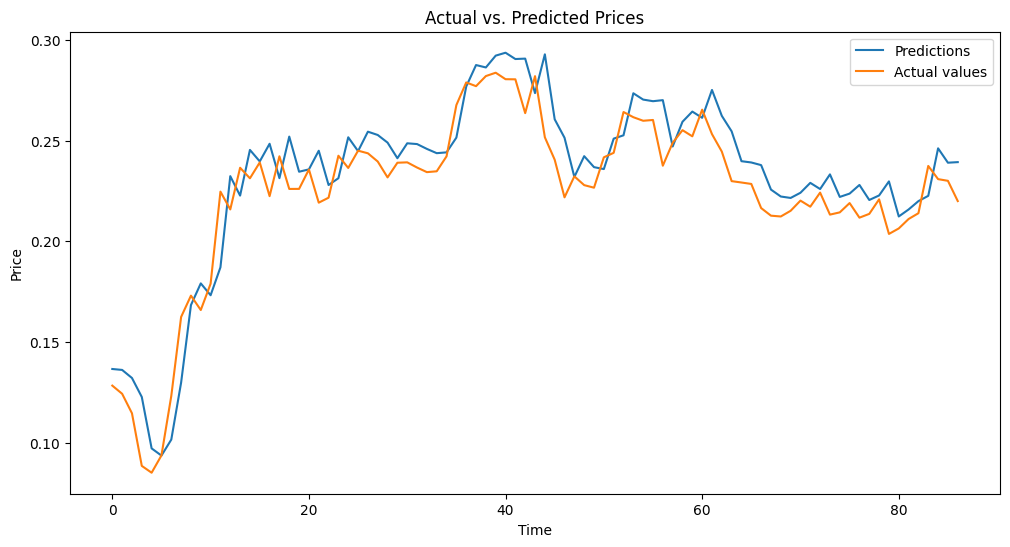

1/1 [==============================] - 0s 41ms/step
Predicted price for the next 1 days: 27661.42


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
import ipywidgets as widgets
from tensorflow.keras.losses import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score



# We obtained historical data from the Yahoo Finance API
def get_historical_data(ticker_symbol, n_years):
    e_d = pd.Timestamp.today()
    s_d = e_d - pd.DateOffset(years=n_years)
    df = yf.download(ticker_symbol, start=s_d, end=e_d)
    return df

# We established a function named prepare_data, which accepts a DataFrame (df) as an argument
def prepare_data(df):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaleddata = scaler.fit_transform(df['Close'].values.reshape(-1, 1))
    return scaler, scaleddata

# Defined a function for dataset creation
def create_dataset(dataset, time_steps=1):
    X, Y = [], []
    for i in range(len(dataset)-time_steps):
        X.append(dataset[i:(i+time_steps), 0])
        Y.append(dataset[i+time_steps, 0])
    return np.array(X), np.array(Y)

# GRU model is defined
def create_model(X_train):
    model = Sequential()
    model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(GRU(units=50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# train model
def train_model(model, X_train, Y_train):
    model.fit(X_train, Y_train, epochs=1, batch_size=1, verbose=2)


# make predictions
def make_predictions(model, X_test, scaler):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction

# widgets are defined for the purpose of user input
ticker_widget = widgets.Text(
    value='BTC-USD',
    placeholder='Enter the ticker symbol of the cryptocurrency (e.g. BTC-USD)',
    description='Ticker Symbol:',
    disabled=False
)

n_years_widget = widgets.IntSlider(
    value=2,
    min=1,
    max=5,
    step=1,
    description='Number of years to retrieve: ',
)

n_days_widget = widgets.IntSlider(
    value=7,
    min=1,
    max=30,
    step=1,
    description='Number of days to predict: ',
)

update_plot_button = widgets.Button(description="Update Plot")

# Output plot is shown
output_plot = widgets.Output()

def on_button_click(b):
    # historical data is retrieved
    df = get_historical_data(ticker_widget.value, n_years_widget.value)
    print(df)

    # data is prepared
    scaler, scaleddata = prepare_data(df)

    # we splitted data into 2 sets: train and test
    train_data = scaleddata[:int(len(df)*0.8)]
    test_data = scaleddata[int(len(df)*0.8):]

    # training dataset is created
    time_steps = 60
    X_train, Y_train = create_dataset(train_data, time_steps)
    X_test, Y_test = create_dataset(test_data, time_steps)

# change the input to samples, time steps, and features
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    
    # model is build
    model = Sequential()
    model.add(GRU(50, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    # Train the model
    model.fit(X_train, Y_train, epochs=50, batch_size=1, verbose=2)
    
    # predictions for testing data is made
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    predictions = model.predict(X_test)

    # Find the mean absolute error, the RMSE, the MSE, and the R2 score
    mae = mean_absolute_error(Y_test, predictions[:, 0])
    # rmse = mean_squared_error(Y_test, predictions[:, 0], squared=False)
    mse = mean_squared_error(Y_test, predictions[:, 0])
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_test, predictions[:, 0])

    rmse_percent = rmse / (Y_test.max() - Y_test.min()) * 100
    mae_percent = mae / (Y_test.max() - Y_test.min()) * 100
    r2_percent = (r2 + 1) / 2 * 100  # Since R2 number can be less than 0, we shift and scale it to be between 0 and 100.

    # values are printed
    print("Model Accuracy:")
    print(f"RMSE: {rmse_percent:.2f}%")
    print(f"MAE: {mae_percent:.2f}%")
    print(f"R2 Score: {r2_percent:.2f}%")
    
    # predictions are shown through a plot
    plt.figure(figsize=(12, 6))
    plt.plot(predictions, label='Predictions')
    plt.plot(Y_test, label='Actual values')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title('Actual vs. Predicted Prices')
    plt.legend()
    plt.show()



    # figured out what the price will be in n days.
    last_n_days = scaleddata[-time_steps:]
    last_n_days = np.reshape(last_n_days, (1, time_steps, 1))
    predicted_price = model.predict(last_n_days)
    predicted_price = scaler.inverse_transform(predicted_price)
    print("Predicted price for the next", n_days_widget.value, "days:", predicted_price[0][0])


# For creating widgets
# ticker_widget = widgets.Text(value='BTC-USD', description='Ticker symbol: ')
ticker_widget = widgets.Dropdown(
    options=['BTC-USD','ETH-USD','USDT-USD','BNB-USD','USDC-USD','XRP-USD','ADA-USD','STETH-USD','DOGE-USD','HEX-USD','SOL-USD','MATIC-USD','WTRX-USD',
             'TRX-USD','DOT-USD','LTC-USD','BUSD-USD','SHIB-USD','AVAX-USD','DAI-USD','WBTC-USD','LINK-USD','LEO-USD','ATOM-USD','UNI7083-USD','XMR-USD',
             'OKB-USD','ETC-USD','XLM-USD','TON11419-USD'],
    value='BTC-USD',
    description='Select cryptocurrency 1:',
)

n_years_widget = widgets.IntSlider(
    value=2,
    min=1,
    max=10,
    step=1,
    description='Number of years: ',
)
n_days_widget = widgets.IntSlider(
    value=7,
    min=1,
    max=30,
    step=1,
    description='Number of days to predict: ',
)
button = widgets.Button(description='Update plot')

# defined a function that will update plot when button is hit
button.on_click(on_button_click)

# widgets and the button are displayed
display(ticker_widget, n_years_widget, n_days_widget, button)

# **SVM AFTER TUNING**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import ipywidgets as widgets
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Retrieve historical data from Yahoo Finance API
def get_historical_data(ticker_symbol, n_years):
    e_d = pd.Timestamp.today()
    s_d = e_d - pd.DateOffset(years=n_years)
    df = yf.download(ticker_symbol, start=s_d, end=e_d)
    return df

# Prepare data
def prepare_data(df):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))
    return scaler, scaled_data

# Define function for creating dataset
def create_dataset(dataset, time_steps=1):
    X, Y = [], []
    for i in range(len(dataset)-time_steps):
        X.append(dataset[i:(i+time_steps), 0])
        Y.append(dataset[i+time_steps, 0])
    return np.array(X), np.array(Y)

# Train model
def train_model(X_train, Y_train):
    parameters = {'kernel': ('linear', 'rbf', 'poly'), 'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1]}
    svr = SVR()
    model = GridSearchCV(svr, parameters)
    model.fit(X_train, Y_train.ravel())
    return model

# Make predictions
def make_predictions(model, X_test, scaler):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
    return predictions

# Define widgets for user input
ticker_widget = widgets.Dropdown(
    options=['BTC-USD', 'ETH-USD', 'USDT-USD', 'BNB-USD', 'USDC-USD', 'XRP-USD', 'ADA-USD', 'STETH-USD', 'DOGE-USD', 'HEX-USD', 'SOL-USD', 'MATIC-USD', 'WTRX-USD', 'TRX-USD', 'DOT-USD', 'LTC-USD', 'BUSD-USD', 'SHIB-USD', 'AVAX-USD', 'DAI-USD', 'WBTC-USD', 'LINK-USD', 'LEO-USD', 'ATOM-USD', 'UNI7083-USD', 'XMR-USD', 'OKB-USD', 'ETC-USD', 'XLM-USD', 'TON11419-USD'],
    value='BTC-USD',
    description='Select cryptocurrency:'
)

n_years_widget = widgets.IntSlider(
    value=2,
    min=1,
    max=5,
    step=1,
    description='Number of years to retrieve:'
)

n_days_widget = widgets.IntSlider(
    value=7,
    min=1,
    max=30,
    step=1,
    description='Number of days to predict:'
)

button = widgets.Button(description='Update Plot')

# Define output plot
output_plot = widgets.Output()

def on_button_click(b):
    with output_plot:
        # Clear previous output
        output_plot.clear_output()

        # Retrieve historical data
        df = get_historical_data(ticker_widget.value, n_years_widget.value)
        print(df)

        # Prepare data
        scaler, scaled_data = prepare_data(df)

        # Split data into train and test sets
        train_data = scaled_data[:int(len(df)*0.8)]
        test_data = scaled_data[int(len(df)*0.8):]

        # Create dataset for training
        time_steps = 10
        X_train, Y_train = create_dataset(train_data, time_steps)
        X_test, Y_test = create_dataset(test_data, time_steps)

        # Create and train model
        model = train_model(X_train, Y_train)

        # Make predictions
        predictions = make_predictions(model, X_test, scaler)

        # Invert actual prices to their original scale
        Y_test = scaler.inverse_transform([Y_test.ravel()])[0]

        # Calculate model accuracy
        mae = mean_absolute_error(Y_test, predictions)
        mse = mean_squared_error(Y_test, predictions)
        rmse = np.sqrt(mse)
        r2 = r2_score(Y_test, predictions)

        # Convert to percentages within 100%
        rmse_percent = min((rmse / (Y_test.max() - Y_test.min())) * 100, 100)
        mae_percent = min((mae / (Y_test.max() - Y_test.min())) * 100, 100)
        r2_percent = min(((r2 + 1) / 2) * 100, 100)

        # Print the values within 100%
        print("Model Accuracy:")
        print(f"RMSE: {rmse_percent:.2f}%")
        print(f"MAE: {mae_percent:.2f}%")
        print(f"R2 Score: {r2_percent:.2f}%")

        # Plot predictions
        plt.figure(figsize=(12, 6))
        plt.plot(predictions, label='Predictions')
        plt.plot(Y_test, label='Actual values')
        plt.xlabel('Time')
        plt.ylabel('Price')
        plt.title('Actual vs. Predicted Prices')
        plt.legend()
        plt.show()

        # Predict price for the selected nth day
        last_n_days = scaled_data[-time_steps:]
        for _ in range(n_days_widget.value):
            last_n_days_reshaped = np.reshape(last_n_days, (1, time_steps))
            predicted_price = model.predict(last_n_days_reshaped)
            last_n_days = np.roll(last_n_days, -1)
            last_n_days[-1] = predicted_price

        predicted_price = scaler.inverse_transform(predicted_price.reshape(-1, 1))

        print(f"Predicted price for the selected {n_days_widget.value}th day:")
        print(predicted_price)

# Register the event handler
button.on_click(on_button_click)

# Display widgets and button
display(ticker_widget, n_years_widget, n_days_widget, button, output_plot)


Dropdown(description='Select cryptocurrency:', options=('BTC-USD', 'ETH-USD', 'USDT-USD', 'BNB-USD', 'USDC-USD…

IntSlider(value=2, description='Number of years to retrieve:', max=5, min=1)

IntSlider(value=7, description='Number of days to predict:', max=30, min=1)

Button(description='Update Plot', style=ButtonStyle())

Output()

# **LSTM ALGORITHM**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import ipywidgets as widgets
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.losses import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score

# We obtained historical data from the Yahoo Finance API
def get_historical_data(ticker_symbol, n_years):
    e_d = pd.Timestamp.today()
    s_d = e_d - pd.DateOffset(years=n_years)
    df = yf.download(ticker_symbol, start=s_d, end=e_d)
    return df

# We established a function named prepare_data, which accepts a DataFrame (df) as an argument
def prepare_data(df):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaleddata = scaler.fit_transform(df['Close'].values.reshape(-1, 1))
    return scaler, scaleddata

# function is defined for creating dataset
def create_dataset(dataset, time_steps=1):
    X, Y = [], []
    for i in range(len(dataset)-time_steps):
        X.append(dataset[i:(i+time_steps), 0])
        Y.append(dataset[i+time_steps, 0])
    return np.array(X), np.array(Y)

# create_model function is created to train LSTM model for regression tasks
def create_model(X_train):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# train model
def train_model(model, X_train, Y_train, epochs=20):
    model.fit(X_train, Y_train, epochs=epochs, batch_size=1, verbose=2)


# predictions are made
def make_prediction(model, X_test, scaler):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction

# widgets are defined for the purpose of user input
ticker_widget = widgets.Dropdown(
    options=['BTC-USD', 'ETH-USD', 'USDT-USD', 'BNB-USD', 'USDC-USD', 'XRP-USD', 'ADA-USD', 'STETH-USD', 'DOGE-USD', 'HEX-USD', 'SOL-USD', 'MATIC-USD', 'WTRX-USD',
             'TRX-USD', 'DOT-USD', 'LTC-USD', 'BUSD-USD', 'SHIB-USD', 'AVAX-USD', 'DAI-USD', 'WBTC-USD', 'LINK-USD', 'LEO-USD', 'ATOM-USD', 'UNI7083-USD', 'XMR-USD',
             'OKB-USD', 'ETC-USD', 'XLM-USD', 'TON11419-USD'],
    value='BTC-USD',
    description='Select cryptocurrency:',
)

n_years_widget = widgets.IntSlider(
    value=2,
    min=1,
    max=5,
    step=1,
    description='Number of years: ',
)

n_days_widget = widgets.IntSlider(
    value=7,
    min=1,
    max=30,
    step=1,
    description='Number of days to predict: ',
)

button = widgets.Button(description='Update plot')

# A function is defined that will update the plot when the button is hit
def on_button_click(b):
    # previous output is cleared
    output_plot.clear_output()

    with output_plot:
        # historical data is retrieved
        df = get_historical_data(ticker_widget.value, n_years_widget.value)
        print(df)

        # data is prepared
        scaler, scaleddata = prepare_data(df)

        # we splitted data into 2 sets: train and test
        train_data = scaleddata[:int(len(df)*0.8)]
        test_data = scaleddata[int(len(df)*0.8):]

        # dataset is created for training
        time_steps = 1
        X_train, Y_train = create_dataset(train_data, time_steps)
        X_test, Y_test = create_dataset(test_data, time_steps)

        # changed input to samples, time steps, and features
        X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

        # created and then trained the model
        model = create_model(X_train)
        train_model(model, X_train, Y_train, epochs=20)  # Train with 10 epochs

        # predictions are made
        prediction = make_prediction(model, X_test, scaler)

        # turned predictions and real prices around and put them on the same scale
        Y_test = scaler.inverse_transform([Y_test])

        # model accuracy is printed
        mse = mean_squared_error(Y_test[0], prediction[:, 0])
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(Y_test[0], prediction[:, 0])
        r2 = r2_score(Y_test[0], prediction[:, 0])
        rmse_percent = rmse / (Y_test.max() - Y_test.min()) * 100
        mae_percent = mae / (Y_test.max() - Y_test.min()) * 100
        r2_percent = (r2 + 1) / 2 * 100

        print("Model Accuracy:")
        print(f"RMSE: {rmse_percent:.2f}%")
        print(f"MAE: {mae_percent:.2f}%")
        print(f"R2 Score: {r2_percent:.2f}%")

        # We plotted a figure that compares actual price to predicted price
        plt.figure(figsize=(12, 6))
        plt.plot(Y_test[0], color='blue', label='Actual Price')
        plt.plot(prediction[:, 0], color='red', label='Predicted Price')
        plt.xlabel('Time')
        plt.ylabel('Price')
        plt.title('Actual vs Predicted Prices')
        plt.legend()
        plt.show()

        # predicted the price for next n_days
        last_n_days = scaleddata[-time_steps:]
        last_n_days = np.reshape(last_n_days, (1, time_steps, 1))
        predicted_price = make_prediction(model, last_n_days, scaler)
        print("Predicted price for the next", n_days_widget.value, "days:", predicted_price[0][0])

# added a button click event handler
button.on_click(on_button_click)

# displayed widgets and button
output_plot = widgets.Output()
display(widgets.VBox([ticker_widget, n_years_widget, n_days_widget, button, output_plot]))
